In [190]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

sns.set_theme(style="ticks",font="Arial")
sns.set_context("notebook",rc={"font.size":7,'svg.fonttype':'none'})


In [214]:
def get_weishaupt_metadata(path='data/Weishaupt/GSE124814_sample_descriptions.xlsx'):
    path=pathlib.Path(path)
    df = pd.read_excel(path,header=1,index_col=0)
    df['consensus_subgroup']=df['characteristics: subgroup relabeled'].fillna(df['source name'])
    return df
def get_weishaupt_expression(path='data/Weishaupt/GSE124814_HW_expr_matrix.tsv'):
    path=pathlib.Path(path)
    return pd.read_csv(path,sep='\t',index_col=0)
def plot_subgroup_transcription(rnaseq, metadata, gene_list):
    rnaseq = rnaseq.loc[gene_list].T
    #rnaseq = np.log(rnaseq+1)
    rnaseq["sample"] = rnaseq.index
    rnaseq = pd.merge(right=rnaseq,left=metadata.consensus_subgroup,how="right",left_index=True,right_index=True)
    rnaseq = pd.melt(rnaseq,id_vars=["sample","consensus_subgroup"],var_name="gene",value_name="normalized gene expression")
    rnaseq = rnaseq[rnaseq.consensus_subgroup != 'Unknown']
    
    flierprops = {"markersize":1}
    ax = sns.boxplot(data=rnaseq,x="gene",y="normalized gene expression",hue="consensus_subgroup",
                palette={"G4":"green","G3":"yellow","SHH":"red","Normal":"grey","WNT":"blue"},
                hue_order=['WNT','SHH','G3','G4','Normal'],
                flierprops=flierprops
               )
    sns.despine()
    ax.xaxis.label.set_visible(False)
    ax.legend().set_title('')
    plt.legend(fontsize=14)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):# + ax.get_legend().get_texts()):
        item.set_fontsize(14)
    plt.gcf().set_size_inches(8, 4)
    plt.savefig("out/gene_expression.svg")
    return rnaseq
def stars(mwu):
    (s,p)=mwu
    q=p*16
    if q < 0.0005:
        stars="***"
    elif q < 0.005:
        stars="**"
    elif q < 0.05:
        stars="*"
    else:
        stars=""
    print(stars)
def mwtest_transcription(rnaseq, metadata, gene_list):
    rnaseq = rnaseq.loc[gene_list].T
    rnaseq["sample"] = rnaseq.index
    rnaseq = pd.merge(right=rnaseq,left=metadata.consensus_subgroup,how="right",left_index=True,right_index=True)
    for gene in gene_list:
        for comparison in ["WNT","G3","G4","Normal"]:
            a = rnaseq[rnaseq.consensus_subgroup=="SHH"][gene]
            b = rnaseq[rnaseq.consensus_subgroup==comparison][gene]
            if len(a) > 0 and len(b) > 0:
                ab = scipy.stats.mannwhitneyu(a,b)
                print(f"Comparing {gene} expression between SHH and {comparison}: {ab}")
                stars(ab)
    return

,sample,consensus_subgroup,gene,normalized gene expression
0,Sample_1,G4,ATOH1,0.224841
1,Sample_2,G4,ATOH1,-0.488737
2,Sample_3,G4,ATOH1,-0.253055
3,Sample_4,G3,ATOH1,-0.002633
4,Sample_5,G4,ATOH1,-0.174650
...,...,...,...,...
6559,Sample_1637,SHH,NFIB,0.005277
6560,Sample_1638,SHH,NFIB,-0.172580
6561,Sample_1639,G4,NFIB,0.030675
6562,Sample_1640,G4,NFIB,-0.129822


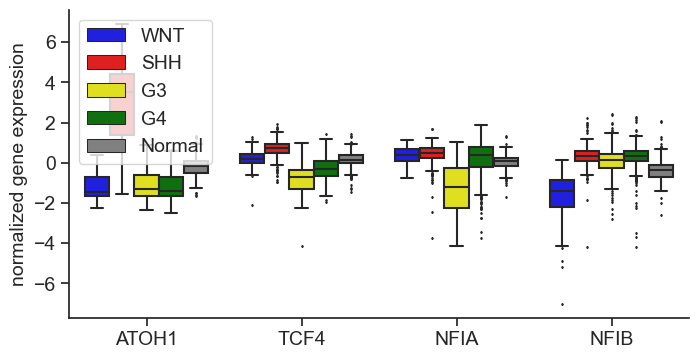

In [215]:
metadata = get_weishaupt_metadata()
data = get_weishaupt_expression()
gene_list=["ATOH1","TCF4","NFIA","NFIB"]
plot_subgroup_transcription(data,metadata,gene_list)

In [209]:
mwtest_transcription(data,metadata,gene_list)

Comparing ATOH1 expression between SHH and WNT: MannwhitneyuResult(statistic=47159.0, pvalue=2.394544793084472e-58)
***
Comparing ATOH1 expression between SHH and G3: MannwhitneyuResult(statistic=92753.0, pvalue=7.13936582572144e-92)
***
Comparing ATOH1 expression between SHH and G4: MannwhitneyuResult(statistic=211568.0, pvalue=3.6330569236423172e-143)
***
Comparing ATOH1 expression between SHH and Normal: MannwhitneyuResult(statistic=111916.0, pvalue=3.3794417723510614e-91)
***
Comparing TCF4 expression between SHH and WNT: MannwhitneyuResult(statistic=39739.0, pvalue=5.4766493573910715e-28)
***
Comparing TCF4 expression between SHH and G3: MannwhitneyuResult(statistic=92366.0, pvalue=2.3718101242821676e-90)
***
Comparing TCF4 expression between SHH and G4: MannwhitneyuResult(statistic=199441.0, pvalue=3.1448712294339734e-112)
***
Comparing TCF4 expression between SHH and Normal: MannwhitneyuResult(statistic=102340.0, pvalue=7.905458280319606e-62)
***
Comparing NFIA expression betwee

In [121]:
data.loc['ATOH1'].var()

3.9178258588485044

In [9]:
a = set(get_expression().columns)
b = set(get_metadata().index)
len(a-b)


1409

In [50]:
a-b-found

{'SRR1324431',
 'SRR1324452',
 'SRR1325986',
 'SRR1327811',
 'SRR1328960',
 'SRR1329334',
 'SRR1329551',
 'SRR1329761',
 'SRR1329835',
 'SRR1329885',
 'SRR1330041',
 'SRR1330061',
 'SRR1330656',
 'SRR1330699',
 'SRR1331289',
 'SRR1331335',
 'SRR1331511',
 'SRR1331597',
 'SRR1331751',
 'SRR1331841',
 'SRR1331944',
 'SRR1332275',
 'SRR1332317',
 'SRR1332796',
 'SRR1332856',
 'SRR1333587',
 'SRR1333767',
 'SRR1333930',
 'SRR1334033',
 'SRR1334564',
 'SRR1334717',
 'SRR1334847',
 'SRR1334960',
 'SRR1335254',
 'SRR1335377',
 'SRR1335400',
 'SRR1335651',
 'SRR1335856',
 'SRR1336006',
 'SRR1336069',
 'SRR1336357',
 'SRR1336379',
 'SRR1336887',
 'SRR1337119',
 'SRR1337564',
 'SRR1337864',
 'SRR1338219',
 'SRR1338669',
 'SRR1339218',
 'SRR1339549',
 'SRR1339651',
 'SRR1339968',
 'SRR1340095',
 'SRR1340202',
 'SRR1340301',
 'SRR1340700',
 'SRR1340907',
 'SRR1341277',
 'SRR1341365',
 'SRR1341387',
 'SRR1341605',
 'SRR1341702',
 'SRR1341763',
 'SRR1342045',
 'SRR1343197',
 'SRR1343481',
 'SRR13466